### 6. Implement Linear Regression in 2 ways:
1. closed-form solution
2. gradient descent. 


In [202]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

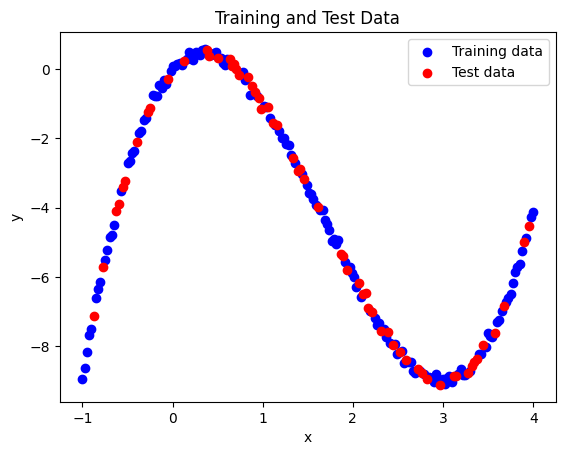

In [203]:
# 1. Load train.csv and test.csv.
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

# extract feature x and target y. 
x_train = train_set['x'].values
y_train = train_set['y'].values
x_test = test_set['x'].values
y_test = test_set['y'].values

# plot the data points (x_i, y_i) using plt.scatter. Plot trianing points in blue and test points in red.
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training and Test Data')
plt.legend()
plt.show()

In [204]:
# 2. Assume a model of the form: y = theta_0 + theta_1 * x.
# a. Use the closed form solution to find optimial theta_0 and theta_1.
# First, construct the matrix X and the target y from the training set. 
matrix_x = np.vstack((np.ones(len(x_train)), x_train)).T
y_train_vector = y_train.reshape(-1, 1)

# Then solve for theta. 
theta = np.linalg.inv(matrix_x.T @ matrix_x) @ matrix_x.T @ y_train_vector
theta_0, theta_1 = theta.flatten()
print("Theta 0: ", theta_0, "Theta 1: ", theta_1)

# generate predictions: (theta_0 + theta_1 * x_i) -> y_train_pred
y_train_pred = matrix_x @ theta
matrix_x_test = np.vstack((np.ones(len(x_test)), x_test)).T
y_test_pred = matrix_x_test @ theta

# Finally, calculate the MSE (Mean Squared Error) on the training set and test set. *specifics included. 
# def mse(n, y_i, theta_0, theta_1, x_i):
#     return (1.0/n) * sum((y_i -(theta_0 + theta_1 * x_i))**2)
    
def mse(n, y_i, pred):
    return (1.0 / n) * (np.sum((y_i - pred)**2))

# resize:
y_train_pred = np.resize(y_train_pred, y_train.shape)
y_test_pred = np.resize(y_test_pred, y_test.shape)

# calculate MSE for training set: 
train_mse = mse(len(y_train), y_train, y_train_pred)
test_mse = mse(len(y_test), y_test, y_test_pred)

print("train mse: ", train_mse, "test mse: ", test_mse)

Theta 0:  -2.4461379810161716 Theta 1:  -1.3618869890538665
train mse:  6.962045264556655 test mse:  5.861140062048121


[[0.]
 [0.]]
[[-1.24842504]
 [-2.69554713]]
[[-1.03195765]
 [-1.54260284]]
[[-1.35315355]
 [-1.904366  ]]
[[-1.43472828]
 [-1.68605739]]
[[-1.58379138]
 [-1.70384424]]
[[-1.68375717]
 [-1.63796732]]
[[-1.78299036]
 [-1.61215731]]
[[-1.86511763]
 [-1.57719113]]
[[-1.93871719]
 [-1.5514645 ]]
[[-2.00235374]
 [-1.52708503]]
[[-2.05825953]
 [-1.50650989]]
[[-2.10702504]
 [-1.48823535]]
[[-2.14969765]
 [-1.47237209]]
[[-2.18698565]
 [-1.45846061]]
[[-2.21958914]
 [-1.44631633]]
[[-2.24808859]
 [-1.43569313]]
[[-2.27300374]
 [-1.42640895]]
[[-2.29478415]
 [-1.41829172]]
[[-2.3138247 ]
 [-1.41119604]]
[[-2.33046987]
 [-1.40499285]]
[[-2.34502108]
 [-1.3995701 ]]
[[-2.35774172]
 [-1.3948295 ]]
[[-2.36886208]
 [-1.39068529]]
[[-2.37858349]
 [-1.38706243]]
[[-2.38708194]
 [-1.38389533]]
[[-2.39451127]
 [-1.38112665]]
[[-2.40100597]
 [-1.37870627]]
[[-2.40668364]
 [-1.37659038]]
[[-2.41164705]
 [-1.37474068]]
[[-2.41598605]
 [-1.37312367]]
[[-2.41977921]
 [-1.37171008]]
[[-2.42309517]
 [-1.370474

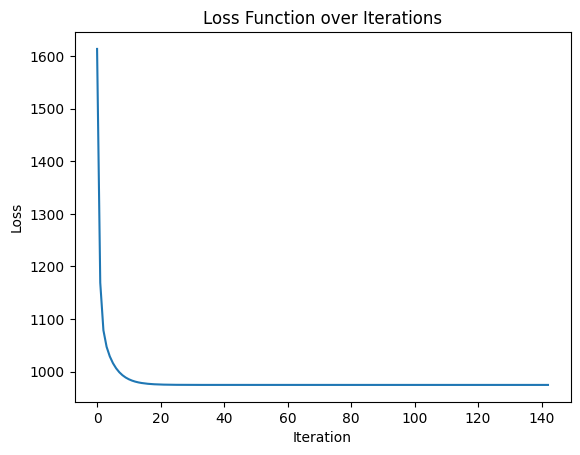

Theta 0:  -2.446137974365406 Theta 1:  -1.3618869915323983
Train MSE:  6.962045264556655
Test MSE:  5.861140062048121


In [205]:
# b. Gradient Descent
# Implement the gradient descent algorithm to find theta_0 and theta_1.

# loss function:
def loss(theta):
    return np.linalg.norm(matrix_x @ theta - y_train_vector)**2

# gradient:
def gradient(theta):
    return 2 * matrix_x.T @ (matrix_x @ theta - y_train_vector)

# gradient descent update:
def update(theta, alpha):
    return theta - alpha * gradient(theta)

# initialize theta and alpha
theta_gd = np.zeros((2,1))
print(theta_gd)

alpha = 0.001
num_iterations = 10000
losses = []

for i in range(num_iterations):
    #perform one update on theta[0]:
    theta_gd = update(theta_gd, alpha)
    #stop criterion:
    if np.linalg.norm(gradient(theta_gd)) < 1e-6:
        print("Converged after ", i, " iterations.")
        break
    losses.append(loss(theta_gd))
    print(theta_gd)

# 3. Plot the loss function over iterations.

plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')
plt.show()

# generate predictions:
y_train_pred = matrix_x @ theta
y_test_pred = matrix_x_test @ theta

# resize:
y_train_pred = np.resize(y_train_pred, y_train.shape)
y_test_pred = np.resize(y_test_pred, y_test.shape)
print("Theta 0: ", theta_gd[0][0], "Theta 1: ", theta_gd[1][0])
print("Train MSE: ", mse(len(y_train), y_train, y_train_pred))
print("Test MSE: ", mse(len(y_test), y_test, y_test_pred))



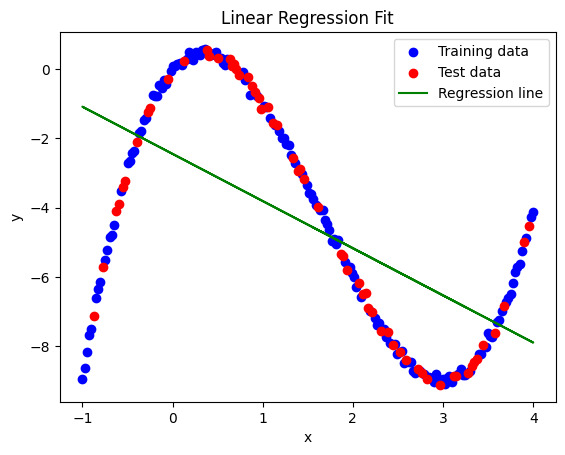

In [206]:
# plot the regression line
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Test data')
plt.plot(x_train, y_train_pred, color='green', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [207]:
# c. Compare and discuss:
    # Parameter comparison
    # Error comparison
    # Plotting

In [208]:
# 3. Assume a quadratic model of the form: y = theta_0 + theta_1 * x + theta_2 * x^2.
    # note the changes: construct the matrix x:
matrix_x = np.vstack((np.ones(len(x_train)), x_train, x_train**2)).T

# a. Use the closed form solution to find optimial theta_0, theta_1, and theta_2.
    # solve for theta
theta = np.linalg.inv(matrix_x.T @ matrix_x) @ matrix_x.T @ y_train_vector
theta_0, theta_1, theta_2 = theta.flatten()
print("Theta 0: ", theta_0, "Theta 1: ", theta_1, "Theta 2: ", theta_2)

# MSE:
y_train_pred = matrix_x @ theta
y_test_pred = matrix_x @ theta

#resize (remove extra dimension): 
y_train_pred = np.resize(y_train_pred, y_train.shape)
y_test_pred = np.resize(y_test_pred, y_test.shape)

train_mse = mse(len(y_train), y_train, y_train_pred)
test_mse = mse(len(y_test), y_test, y_test_pred)
print("train mse: ", train_mse, "test mse: ", test_mse)




Theta 0:  -2.445550990232994 Theta 1:  0.12870789861466703 Theta 2:  -0.4990958123900395
train mse:  6.045657725729194 test mse:  14.365176491180355


[[0.]
 [0.]
 [0.]]
Converged after  2225  iterations.


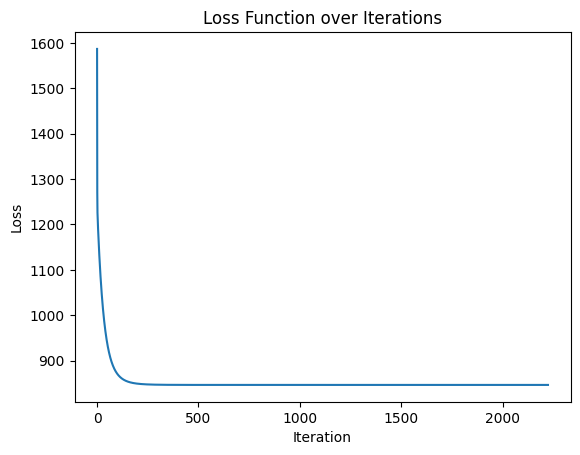

Theta 0:  -2.4455509852555224 Theta 1:  0.12870788797003835 Theta 2:  -0.4990958096220729


In [209]:
# b. Gradient Descent
# find optimal theta_0, theta_1, and theta_2 using gradient descent.
# initialize theta and alpha

theta_gd = np.zeros((3,1))
print(theta_gd)

alpha = 0.0001
num_iterations = 10000
losses = []

for i in range(num_iterations):
    #perform one update on theta[0]:
    theta_gd = update(theta_gd, alpha)
    #stop criterion:
    if np.linalg.norm(gradient(theta_gd)) < 1e-6:
        print("Converged after ", i, " iterations.")
        break
    losses.append(loss(theta_gd))
    # print(theta_gd)

# 3. Plot the loss function over iterations.

plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')
plt.show()

# # generate predictions:
# y_train_pred = matrix_x @ theta
# y_test_pred = matrix_x_test @ theta

# # resize:
# y_train_pred = np.resize(y_train_pred, y_train.shape)
# y_test_pred = np.resize(y_test_pred, y_test.shape)
print("Theta 0: ", theta_gd[0][0], "Theta 1: ", theta_gd[1][0], "Theta 2: ", theta_gd[2][0])
# print("Train MSE: ", mse(len(y_train), y_train, y_train_pred))
# print("Test MSE: ", mse(len(y_test), y_test, y_test_pred))



In [210]:
# 4. Assume a cubic model of the form: y = theta_0 + theta_1 * x + theta_2 * x^2 + theta_3 * x^3.
    # note the changes: construct the matrix x:
matrix_x= np.vstack((np.ones(len(x_train)), x_train, x_train**2, x_train**3)).T

# a. Use the closed form solution to find optimial theta_0, theta_1, theta_2, and theta_3.
theta = np.linalg.inv(matrix_x.T @ matrix_x) @ matrix_x.T @ y_train_vector
theta_0, theta_1, theta_2, theta_3 = theta.flatten()
print("Theta 0: ", theta_0, "Theta 1: ", theta_1, "Theta 2: ", theta_2, "Theta 3: ", theta_3)

# MSE: 
y_train_pred = matrix_x @ theta
y_test_pred = matrix_x @ theta

#resize (remove extra dimension):
y_train_pred = np.resize(y_train_pred, y_train.shape)
y_test_pred = np.resize(y_test_pred, y_test.shape)

train_mse = mse(len(y_train), y_train, y_train_pred)
test_mse = mse(len(y_test), y_test, y_test_pred)
print("train mse: ", train_mse, "test mse: ", test_mse)

# b. Gradient Descent
# c. Compare and discuss:
    # Parameter comparison
    # Error comparison
    # Plotting


Theta 0:  -0.01809716481636335 Theta 1:  2.98461213357388 Theta 2:  -4.9781873132505154 Theta 3:  0.9953966685273948
train mse:  0.008813265546337991 test mse:  18.61631478398768


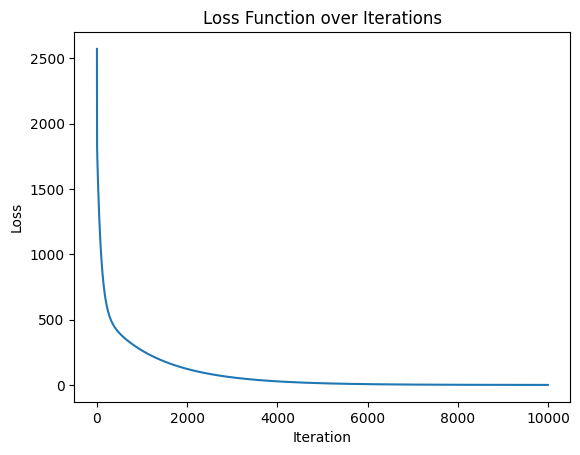

Theta 0:  -0.06283021795196862 Theta 1:  2.898694026259888 Theta 2:  -4.890957447888759 Theta 3:  0.9787655892549599


In [219]:
# b. Gradient Descent
# find optimal theta_0, theta_1, theta_2, and theta_3 using gradient descent.
# initialize theta and alpha

theta_gd = np.zeros((4,1))


alpha = 0.00001
num_iterations = 10000
losses = []

for i in range(num_iterations):
    #perform one update on theta[0]:
    theta_gd = update(theta_gd, alpha)
    #stop criterion:
    if np.linalg.norm(gradient(theta_gd)) < 1e-6:
        print("Converged after ", i, " iterations.")
        break
    losses.append(loss(theta_gd))
    #print(theta_gd)

# 3. Plot the loss function over iterations.
plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function over Iterations')
plt.show()

# # generate predictions:
# y_train_pred = matrix_x @ theta
# y_test_pred = matrix_x_test @ theta

# # resize:
# y_train_pred = np.resize(y_train_pred, y_train.shape)
# y_test_pred = np.resize(y_test_pred, y_test.shape)
print("Theta 0: ", theta_gd[0][0], "Theta 1: ", theta_gd[1][0], "Theta 2: ", theta_gd[2][0], "Theta 3: ", theta_gd[3][0])
# print("Train MSE: ", mse(len(y_train), y_train, y_train_pred))
# print("Test MSE: ", mse(len(y_test), y_test, y_test_pred))



GRADIENT DESCENT: 
Updated values of alpha. alpha = 0.001 -> 0.0001 -> 0.00001